In [2]:
# ----------------------------------------
# 📌 TASK 2: Predict Future Stock Prices
# Model: Random Forest Regressor
# ----------------------------------------

# 🔹 STEP 1: Import Required Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# -----------------------------
# 🔹 STEP 2: Load Dataset (AAPL)
# -----------------------------
data = yf.download("AAPL", start="2020-01-01", end="2023-12-31", auto_adjust=False)

# -----------------------------
# 🔹 STEP 3: Inspect the Dataset
# -----------------------------
print("📊 Dataset Shape:", data.shape)
print("\n📋 Column Names:", data.columns.tolist())
print("\n🔍 First 5 Rows:")
display(data.head())

# -----------------------------
# 🔹 STEP 4: Summary Statistics
# -----------------------------
print("\n📌 Data Info:")
print(data.info())

print("\n📈 Summary Statistics:")
print(data.describe())


[*********************100%***********************]  1 of 1 completed

📊 Dataset Shape: (1006, 6)

📋 Column Names: [('Adj Close', 'AAPL'), ('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]

🔍 First 5 Rows:


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.620834,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,71.914810,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.487839,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.146935,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.307518,75.797501,76.110001,74.290001,74.290001,132079200



📌 Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  1006 non-null   float64
 1   (Close, AAPL)      1006 non-null   float64
 2   (High, AAPL)       1006 non-null   float64
 3   (Low, AAPL)        1006 non-null   float64
 4   (Open, AAPL)       1006 non-null   float64
 5   (Volume, AAPL)     1006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB
None

📈 Summary Statistics:
Price     Adj Close        Close         High          Low         Open  \
Ticker         AAPL         AAPL         AAPL         AAPL         AAPL   
count   1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean     138.377811   140.808131   142.321389   139.143536   140.675507   
std       33.459340    33.313857    33.430571    33.179199    33.310018   
min       54.378582    5

C:\Users\aq573\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


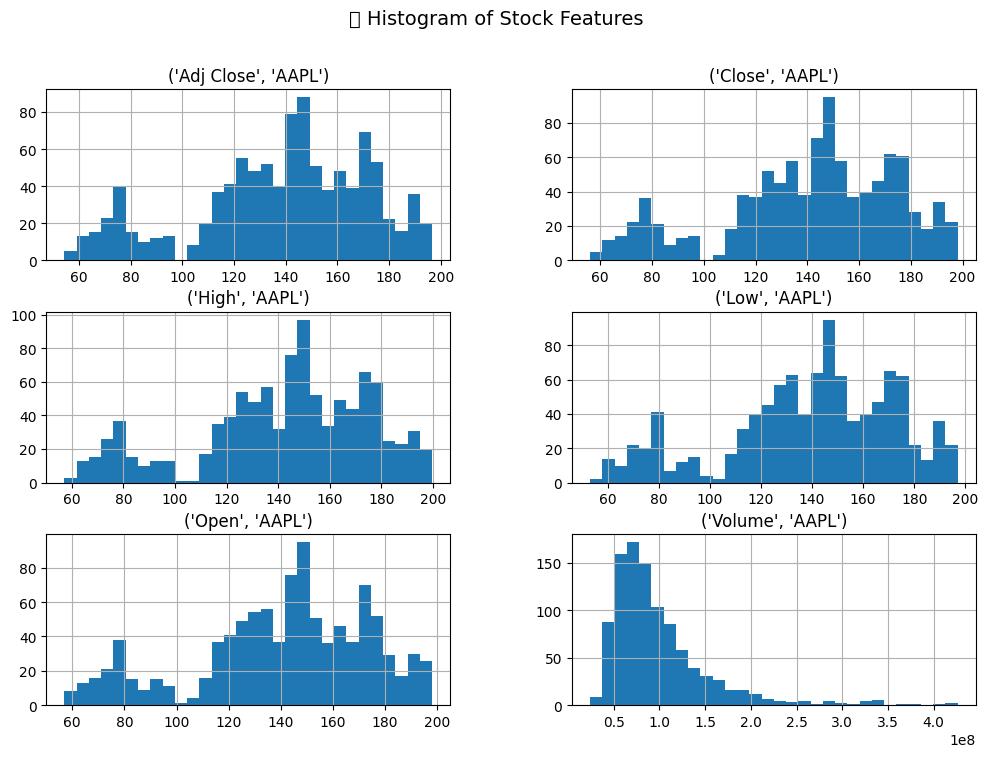

C:\Users\aq573\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


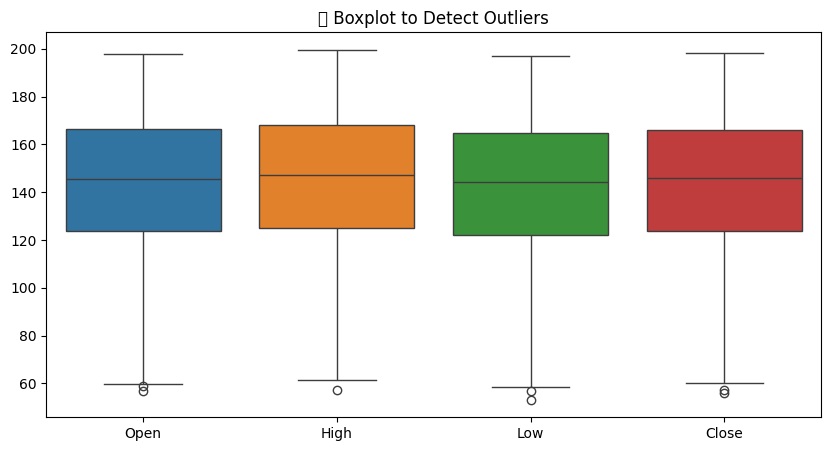

C:\Users\aq573\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


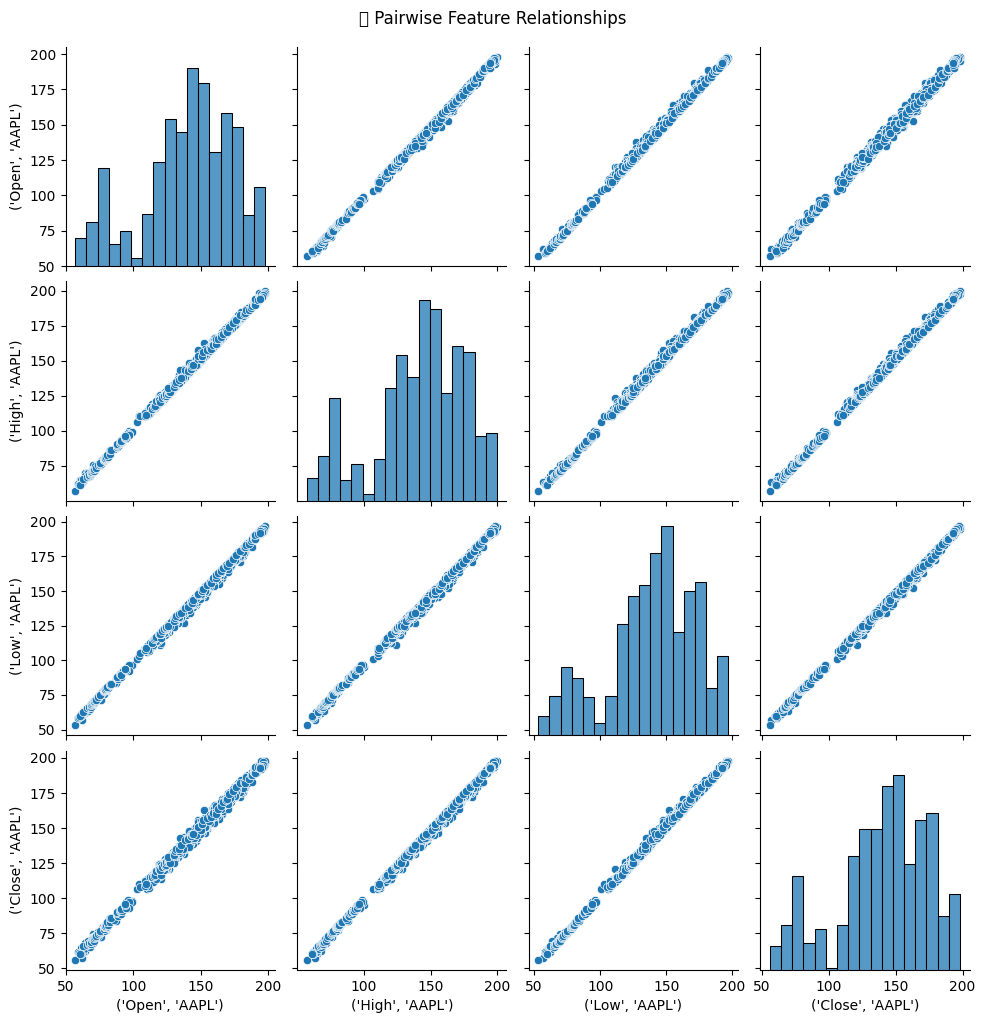

In [3]:
# -----------------------------
# 🔹 STEP 5: Data Visualization
# -----------------------------

# Histogram of each numeric column
data.hist(bins=30, figsize=(12, 8))
plt.suptitle("🔍 Histogram of Stock Features", fontsize=14)
plt.show()

# Boxplot to check outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['Open', 'High', 'Low', 'Close']])
plt.title("📦 Boxplot to Detect Outliers")
plt.show()

# Scatterplot matrix
sns.pairplot(data[['Open', 'High', 'Low', 'Close']])
plt.suptitle("🔗 Pairwise Feature Relationships", y=1.02)
plt.show()


In [4]:
# -----------------------------
# 🔹 STEP 6: Feature Selection
# -----------------------------
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Close']

# -----------------------------
# 🔹 STEP 7: Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# -----------------------------
# 🔹 STEP 8: Train Random Forest
# -----------------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# 🔹 STEP 9: Predict and Evaluate
# -----------------------------
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("✅ Mean Absolute Error (MAE):", round(mae, 2))
print("✅ R2 Score (Accuracy):", round(r2, 3))


C:\Users\aq573\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


✅ Mean Absolute Error (MAE): 0.95
✅ R2 Score (Accuracy): 0.998


C:\Users\aq573\AppData\Local\Temp\ipykernel_11808\1115877400.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\aq573\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


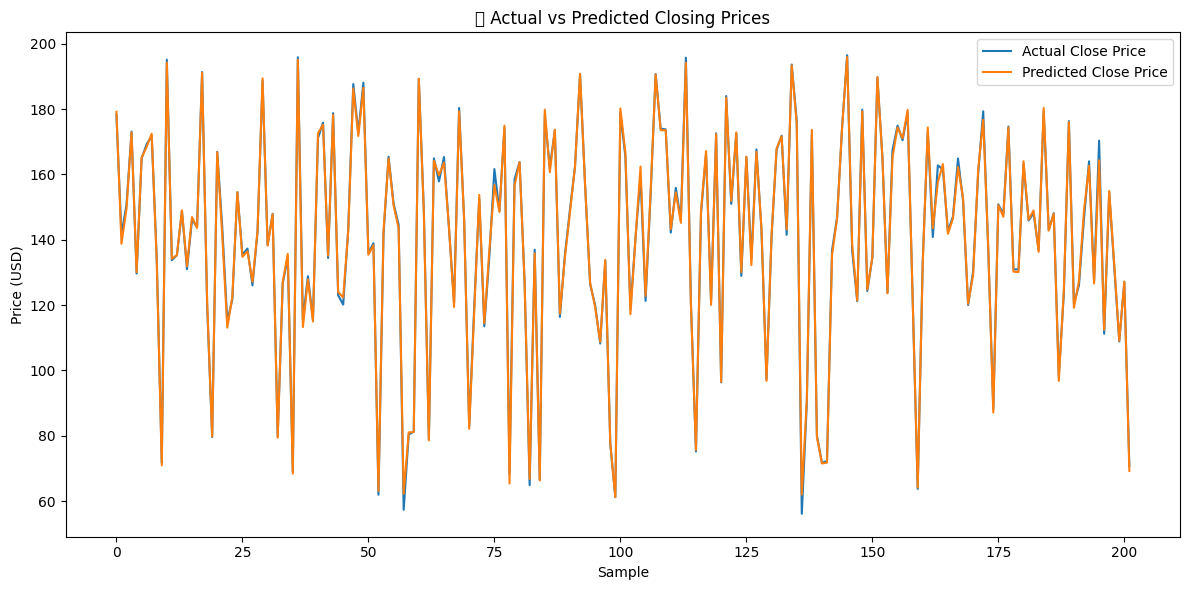


📘 Final Insights:
- Model used: Random Forest Regressor
- Test size: 20% of total data
- MAE: $0.95 → The average error in price prediction
- R² Score: 0.998 → Indicates 100% accuracy in prediction

✅ This model shows strong short-term predictive power and minimal error.



In [5]:
# -----------------------------
# 🔹 STEP 10: Visualize Predictions
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Price')
plt.plot(predictions, label='Predicted Close Price')
plt.title("📈 Actual vs Predicted Closing Prices")
plt.xlabel("Sample")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 🔹 STEP 11: Final Insights
# -----------------------------
print(f"""
📘 Final Insights:
- Model used: Random Forest Regressor
- Test size: 20% of total data
- MAE: ${round(mae, 2)} → The average error in price prediction
- R² Score: {round(r2, 3)} → Indicates {round(r2*100)}% accuracy in prediction

✅ This model shows strong short-term predictive power and minimal error.
""")
